# Apartement Rent Data
Dataset source: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split

import re

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../../Datasets/Apartement Rent Data/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv',
                 sep=';',
                 encoding='cp1252',
                low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [4]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [5]:
useless_cols = ['address','id','title','body','currency','price_display','cityname','time']

In [6]:
df.drop(useless_cols,axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99491 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      99491 non-null  object 
 1   amenities     83447 non-null  object 
 2   bathrooms     99428 non-null  float64
 3   bedrooms      99367 non-null  float64
 4   fee           99491 non-null  object 
 5   has_photo     99491 non-null  object 
 6   pets_allowed  39067 non-null  object 
 7   price         99491 non-null  float64
 8   price_type    99491 non-null  object 
 9   square_feet   99491 non-null  int64  
 10  state         99189 non-null  object 
 11  latitude      99466 non-null  float64
 12  longitude     99466 non-null  float64
 13  source        99491 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 11.4+ MB


In [8]:
train,test = train_test_split(df,shuffle=True,test_size=0.1,random_state=42)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('price',axis=1),
                                                 train['price'],
                                                shuffle=True,
                                                test_size=0.2,
                                                random_state=42)

# Data Preprocessing

In [10]:
X_train.isna().mean()

category        0.000000
amenities       0.161534
bathrooms       0.000656
bedrooms        0.001382
fee             0.000000
has_photo       0.000000
pets_allowed    0.606614
price_type      0.000000
square_feet     0.000000
state           0.003141
latitude        0.000293
longitude       0.000293
source          0.000000
dtype: float64

## Missing Data Imputation

In [11]:
num_cols = ['bathrooms','bedrooms']

array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>]], dtype=object)

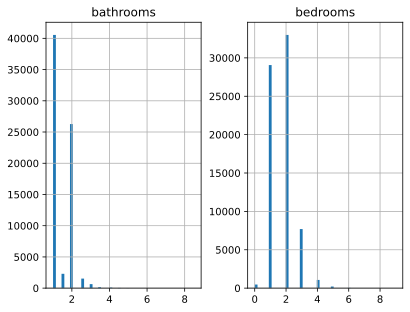

In [12]:
X_train[num_cols].hist(bins=50)

In [13]:
cat_cols = ['amenities','pets_allowed','state']

In [14]:
preprocessor = ColumnTransformer(
    transformers=(
        ('numeric_imputer',SimpleImputer(strategy='median',add_indicator=True),num_cols),
        ('categorical_imputer',SimpleImputer(strategy='constant',fill_value='Missing'),cat_cols)
    ),
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [15]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=(('numeric_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['bathrooms', 'bedrooms']),
                                ('categorical_imputer',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 ['amenities', 'pets_allowed', 'state'])),
                  verbose_feature_names_out=False)

In [16]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=(('numeric_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['bathrooms', 'bedrooms']),
                                ('categorical_imputer',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 ['amenities', 'pets_allowed', 'state'])),
                  verbose_feature_names_out=False)

In [17]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
X_train.isna().mean()

bathrooms                     0.000000
bedrooms                      0.000000
missingindicator_bathrooms    0.000000
missingindicator_bedrooms     0.000000
amenities                     0.000000
pets_allowed                  0.000000
state                         0.000000
category                      0.000000
fee                           0.000000
has_photo                     0.000000
price_type                    0.000000
square_feet                   0.000000
latitude                      0.000293
longitude                     0.000293
source                        0.000000
dtype: float64

In [19]:
X_test.isna().mean()

bathrooms                     0.000000
bedrooms                      0.000000
missingindicator_bathrooms    0.000000
missingindicator_bedrooms     0.000000
amenities                     0.000000
pets_allowed                  0.000000
state                         0.000000
category                      0.000000
fee                           0.000000
has_photo                     0.000000
price_type                    0.000000
square_feet                   0.000000
latitude                      0.000112
longitude                     0.000112
source                        0.000000
dtype: float64

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bathrooms                   71632 non-null  float64
 1   bedrooms                    71632 non-null  float64
 2   missingindicator_bathrooms  71632 non-null  float64
 3   missingindicator_bedrooms   71632 non-null  float64
 4   amenities                   71632 non-null  object 
 5   pets_allowed                71632 non-null  object 
 6   state                       71632 non-null  object 
 7   category                    71632 non-null  object 
 8   fee                         71632 non-null  object 
 9   has_photo                   71632 non-null  object 
 10  price_type                  71632 non-null  object 
 11  square_feet                 71632 non-null  int64  
 12  latitude                    71611 non-null  float64
 13  longitude                   7161

## Amenities

In [21]:
unique_amenities = X_train.amenities.unique()
unique_amenities

array(['Missing', 'Basketball,Pool,Tennis,Washer Dryer', 'Parking', ...,
       'Gated,Parking,Patio/Deck,Playground',
       'Fireplace,Gym,Patio/Deck,Playground,Tennis',
       'AC,Gated,Patio/Deck,View,Washer Dryer'], dtype=object)

In [22]:
all_amenities = []
for amenities in unique_amenities:
    amenities = amenities.split(',')
    for a in amenities:
        all_amenities.append(a)

In [23]:
unique_amenities = list(set(all_amenities))

In [24]:
def encode_amenities(df):
    for i in unique_amenities:
        df[f'ame_{i}'] = df.amenities.apply(lambda x : 1 if i in x else 0)
    df.drop('amenities',axis=1,inplace=True)
    return df

In [25]:
X_train = encode_amenities(X_train)
X_test = encode_amenities(X_test)

In [26]:
X_train.shape,X_test.shape

((71632, 42), (17909, 42))

## Pets Allowed

In [28]:
pets_allowed_unique = ['Cats','Dogs']

In [29]:
def encode_pets_allowed(df):
    for i in pets_allowed_unique:
        df[f'pets_allowed_{i}'] = df['pets_allowed'].apply(lambda x:1 if i in x else 0)
    df.drop('pets_allowed',axis=1,inplace=True)
    return df

In [30]:
X_train = encode_pets_allowed(X_train)
X_test = encode_pets_allowed(X_test)

## State

In [31]:
state_unique = X_train.state.unique()

In [32]:
def encode_state(df):
    state_cols = {}
    for s in state_unique:
        state_cols[f'state_{s}'] = df.state.apply(lambda x: 1 if s in x else 0)
    df = pd.concat([df,pd.DataFrame(state_cols)],axis=1)
    df.drop('state',axis=1,inplace=True)
    return df

In [33]:
X_train = encode_state(X_train)
X_test = encode_state(X_test)

In [34]:
X_train.shape

(71632, 94)

## Category

In [35]:
unique_categories = df.category.unique()

In [36]:
all_categories = []
for categories in unique_categories:
    categories = categories.split('/')
    for c in categories:
        all_categories.append(c)

In [37]:
unique_categories = list(set(all_categories))

In [38]:
def encode_category(df):
    for i in unique_categories:
        df[f'cat_{i}'] = df.category.apply(lambda x : 1 if i in x else 0)
    df.drop('category',axis=1,inplace=True)
    return df

In [39]:
X_train = encode_category(X_train)
X_test = encode_category(X_test)

In [40]:
X_train.shape

(71632, 102)

## Fee

In [41]:
X_train.fee.unique()

array(['No', 'Yes'], dtype=object)

In [42]:
X_train.fee = X_train.fee.map({'No':0,'Yes':1})
X_test.fee = X_test.fee.map({'No':0,'Yes':1})

## Has Photo

In [43]:
unique_has_photo = X_train.has_photo.unique()

In [44]:
def encode_has_photo(df):
    for i in unique_has_photo:
        df[f'has_photo_{i}'] = df.has_photo.apply(lambda x: 1 if i in x else 0)
    df.drop('has_photo',axis=1,inplace=True)
    return df

In [45]:
X_train = encode_has_photo(X_train)
X_test = encode_has_photo(X_test)

## Price Type

In [46]:
unique_price_type = ['Monthly','Weekly']

In [47]:
def encode_price_type(df):
    for pt in unique_price_type:
        df[f'pt_{pt}'] = df.price_type.apply(lambda x: 1 if pt in x else 0)
    df.drop('price_type',axis=1,inplace=True)
    return df

In [48]:
X_train = encode_price_type(X_train)
X_test = encode_price_type(X_test)

## Source

In [49]:
unique_source = X_train.source.unique()

In [50]:
def encode_source(df):
    source_cols = {}
    for s in unique_source:
        source_cols[f'source_{s}'] = df.source.apply(lambda x: 1 if s in x else 0)
    df = pd.concat([df,pd.DataFrame(source_cols)],axis=1)
    df.drop('source',axis=1,inplace=True)
    return df

In [51]:
X_train = encode_source(X_train)
X_test = encode_source(X_test)

In [52]:
X_train.shape,X_test.shape

((71632, 127), (17909, 127))

## Latitude and Longitude

In [54]:
X_train[['latitude','longitude']]

,latitude,longitude
94771,42.5504,-87.9321
84778,34.2817,-77.8247
69595,38.4252,-121.4345
96763,40.9383,-73.8292
70554,42.6398,-71.3184
...,...,...
25981,40.7220,-74.0644
72877,36.9161,-76.2193
4830,43.4498,-88.6305
473,30.5104,-97.9027
